In [3]:
# importing required libraries

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
!pip install emoji

In [5]:
import seaborn as sns
import plotly.express as px
import emoji
import string
import nltk
from PIL import Image
from collections import Counter
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

import pickle

In [8]:
df=pd.read_csv('cyberbullying_tweets.csv')

In [9]:
# Initial review

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [11]:
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [12]:
df.tail()

,tweet_text,cyberbullying_type
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity
47691,Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...,ethnicity


In [13]:
# Checking missing values

In [14]:
df.isnull().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

In [15]:
df['cyberbullying_type'].value_counts()

cyberbullying_type
religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: count, dtype: int64

In [16]:
# renaming

In [17]:
#cleaning and Data preporcessing

In [18]:
df=df.rename(columns={
    'tweet_text':'text','cyberbullying_type':'sentiment'
})

In [19]:
df.head()

,text,sentiment
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [20]:
df['sentiment_encoded']=df['sentiment'].replace({
    'religion':1,
    'age':2,
    'ethnicity':3,
    'gender':4,
    'other_cyberbullying':5,
    'not_cyberbullying':6
})

In [21]:
df.tail()

,text,sentiment,sentiment_encoded
47687,"Black ppl aren't expected to do anything, depe...",ethnicity,3
47688,Turner did not withhold his disappointment. Tu...,ethnicity,3
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity,3
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity,3
47691,Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...,ethnicity,3


In [22]:
# nltk download

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [25]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
stop_words = set(stopwords.words('english'))

In [27]:
# preprocessing of text

In [28]:
# function to remove emoji

In [29]:
def strip_emoji(text):
    return emoji.replace_emoji(text, replace="")

In [30]:
# function to convert  text to lower case, remove unwanted characters, urls, etc

In [31]:
def strip_all_entities(text):
    # Replace newline and carriage return characters
    text = text.replace('\r', '').replace('\n', '').lower()
    
    # Remove mentions, URLs, and non-ASCII characters
    text = re.sub(r"(?:@|http?\://)\s+", '', text)
    text = re.sub(r"[^\x00-\x7f]", r'', text)
    
    # Remove numbers
    text = re.sub(r'[0-9]+', '', text)

    # Remove punctuation
    stopchars = string.punctuation
    table = str.maketrans('', '', stopchars)
    text = text.translate(table)

    # Tokenize and remove stopwords
    stop_words = set(stopwords.words('english'))
    text = [word for word in text.split() if word not in stop_words]

    # Rejoin text
    text = ' '.join(text)

    return text

In [32]:
# function to remove contraction

In [33]:
def decontract(text):
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "cannot", text)
    text = re.sub(r"ain't", "is not", text)
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"'re", " are", text)
    text = re.sub(r"'s", " is", text)
    text = re.sub(r"'d", " would", text)
    text = re.sub(r"'ll", " will", text)
    text = re.sub(r"'t", " not", text)
    text = re.sub(r"'ve", " have", text)
    text = re.sub(r"'m", " am", text)
    return text

In [34]:
# function to clean hashtags

In [35]:
def clean_hashtags(tweet):
    new_tweet = " ".join(word.strip() for word in re.split(r'#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet))
    new_tweet2 = " ".join(word.strip() for word in re.split('#|_', new_tweet))
    return new_tweet2

In [36]:
# function to filter special character

def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if('$' in word) or ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

In [37]:
# removing sequence and applying stemming

def remove_mult_spaces(text):
    return re.sub("\s\s+" , " ", text)

# Function to apply stemming
def stemmer(text):
    tokenized = nltk.word_tokenize(text)
    ps = PorterStemmer()
    return ' '.join([ps.stem(words) for words in tokenized])

# Function to apply lemmatization
def lemmatize(text):
    tokenized = nltk.word_tokenize(text)
    lm = WordNetLemmatizer()
    return ' '.join([lm.lemmatize(words) for words in tokenized])

In [38]:
# Using all function
def preprocess(text):
    text = strip_emoji(text)
    text = decontract(text)
    text = strip_all_entities(text)
    text = clean_hashtags(text)
    text = filter_chars(text)
    text = remove_mult_spaces(text)
    text = stemmer(text)
    text = lemmatize(text)
    return text 

In [39]:
df['cleaned_text'] = df['text'].apply(preprocess)
df.head()

,text,sentiment,sentiment_encoded,cleaned_text
0,"In other words #katandandre, your food was cra...",not_cyberbullying,6,word katandandr food crapilici mkr
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,6,aussietv white mkr theblock imacelebrityau tod...
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,6,xochitlsuckkk classi whore red velvet cupcak
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,6,jasongio meh p thank head concern anoth angri ...
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,6,rudhoeenglish isi account pretend kurdish acco...


In [40]:
# dealing with duplicates

In [41]:
df['cleaned_text'].duplicated().sum()

1978

In [42]:
df.drop_duplicates('cleaned_text' ,inplace=True)

In [43]:
# tokenization
df['tweet_list']=df['cleaned_text'].apply(word_tokenize)
df.head()

,text,sentiment,sentiment_encoded,cleaned_text,tweet_list
0,"In other words #katandandre, your food was cra...",not_cyberbullying,6,word katandandr food crapilici mkr,"[word, katandandr, food, crapilici, mkr]"
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,6,aussietv white mkr theblock imacelebrityau tod...,"[aussietv, white, mkr, theblock, imacelebritya..."
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,6,xochitlsuckkk classi whore red velvet cupcak,"[xochitlsuckkk, classi, whore, red, velvet, cu..."
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,6,jasongio meh p thank head concern anoth angri ...,"[jasongio, meh, p, thank, head, concern, anoth..."
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,6,rudhoeenglish isi account pretend kurdish acco...,"[rudhoeenglish, isi, account, pretend, kurdish..."


In [44]:
# eda

In [45]:
# checking length of various tweet text
text_len = []
for text in df.tweet_list:
    tweet_len = len(text)
    text_len.append(tweet_len)
df['text_len'] = text_len

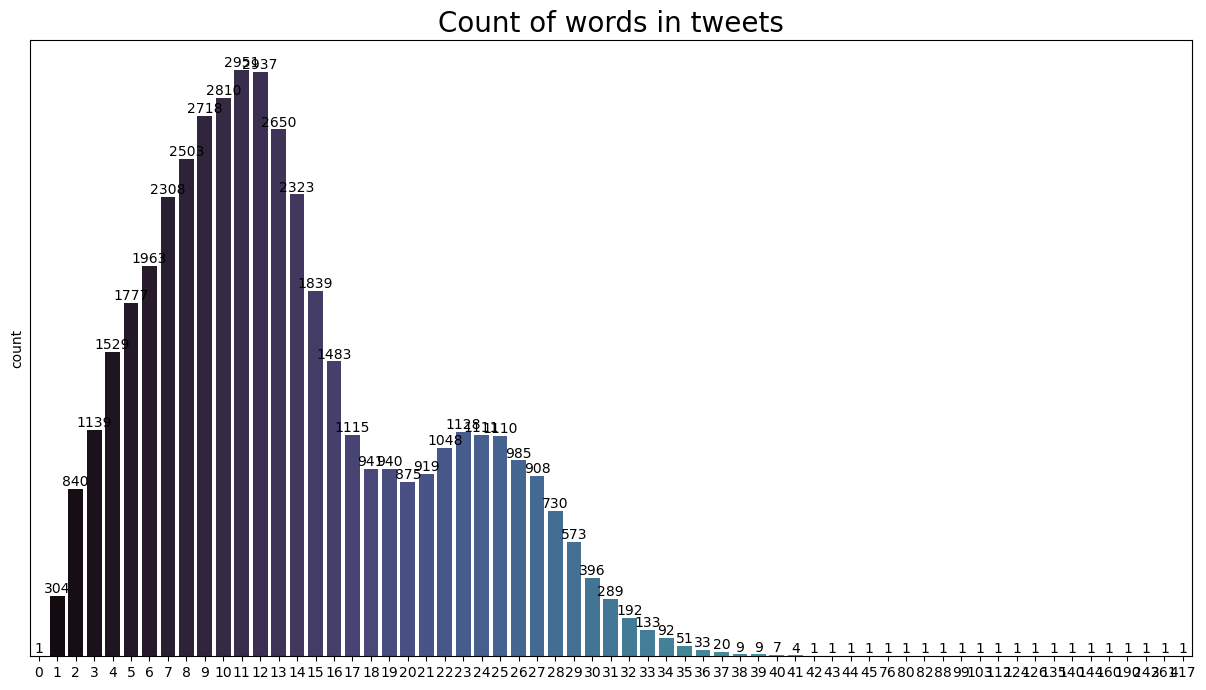

In [46]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x='text_len', data=df, palette='mako')
plt.title('Count of words in tweets', fontsize=20)
plt.yticks([])
ax.bar_label (ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

In [47]:
# removing text without words

In [48]:
df=df[df['text_len']!=0]

In [49]:
df.shape

(45713, 6)

In [50]:
# function to create a word cloud

def plot_wordcloud(cyberbullying_type):
    string = ""
    for i in df[df.sentiment == cyberbullying_type].cleaned_text.values:
        string = string + " " + i.strip()

    wordcloud = WordCloud(background_color='white', max_words=2000, max_font_size=256,
                          random_state=42).generate(string)

    # Plot the wordcloud img
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.title(cyberbullying_type)
    plt.show()
    del string

In [51]:
#splitting data based on sentiment for eda

In [52]:
not_cyberbullying_type = df[df['sentiment']=='not_cyberbullying']
gender_type = df[df['sentiment']=='gender']
religion_type = df[df['sentiment']=='religion']
other_cyberbullying_type = df[df['sentiment']=='other_cyberbullying']
age_type = df[df['sentiment']=='age']
ethnicity_type = df[df['sentiment']=='ethnicity'] 

In [53]:
#EDA

In [54]:
# Assuming gender_type['tweet_list'] is a list of lists of words
gender = Counter([item for sublist in gender_type['tweet_list'] for item in sublist])

# Creating a DataFrame from the Counter's most common elements
top20_gender = pd.DataFrame(gender.most_common(20))

# Assigning column names
top20_gender.columns = ['Top Words', 'Count']

# Displaying the top 20 words with their counts
top20_gender.head(20)

,Top Words,Count
0,joke,5331
1,rape,4202
2,gay,4005
3,call,1404
4,make,1343
5,rt,1222
6,woman,1184
7,bitch,1145
8,femal,1109
9,peopl,997


Text(0.5, 1.0, 'Top 20 words in Gender Cyberbullying')

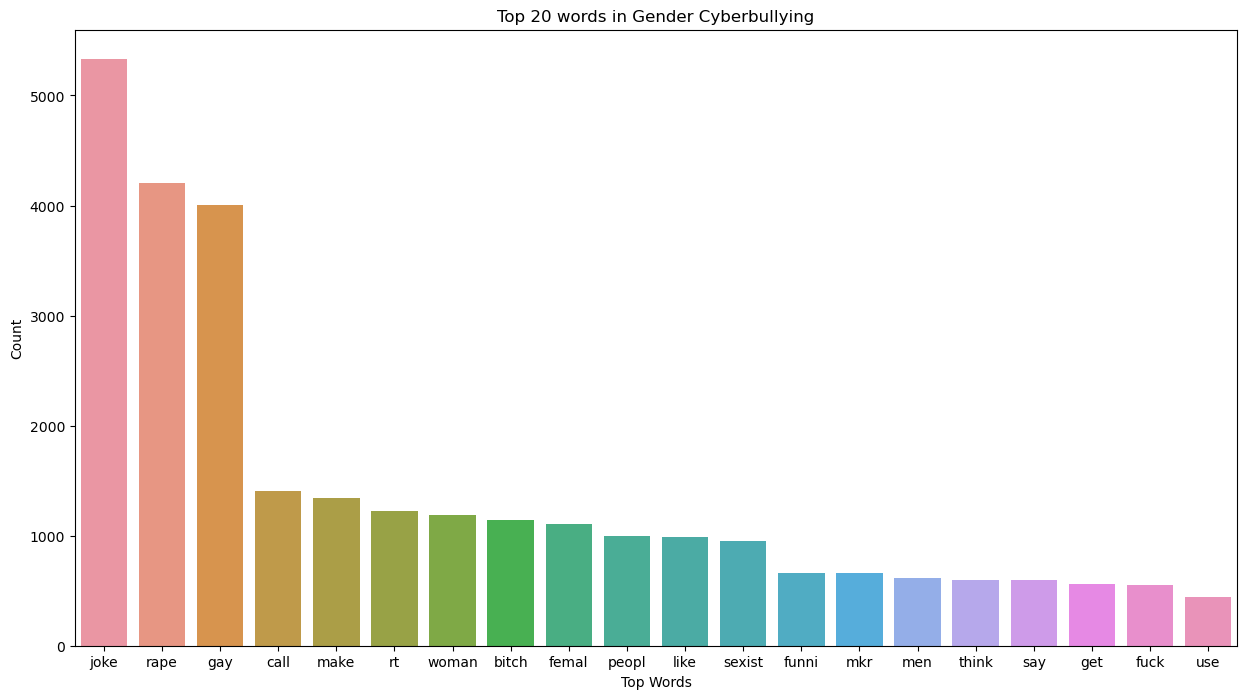

In [55]:
fig = plt.figure(figsize=(15,8))
sns.barplot(data=top20_gender, y="Count", x="Top Words")
plt.title("Top 20 words in Gender Cyberbullying")

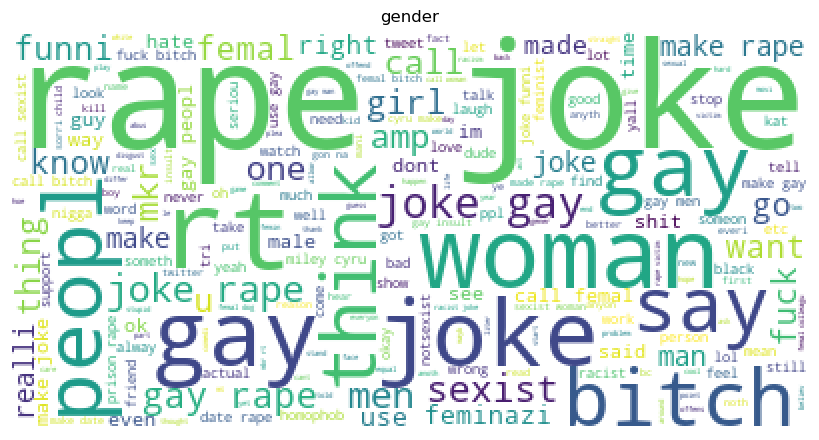

In [56]:
plot_wordcloud('gender')

In [57]:
# religion based

# Assuming religion_type['tweet_list'] is a list of lists of words
religion = Counter([item for sublist in religion_type['tweet_list'] for item in sublist])

# Creating a DataFrame from the Counter's most common elements
top20_religion = pd.DataFrame(religion.most_common(20))

# Assigning column names
top20_religion.columns = ['Top Words', 'Count']

# Displaying the top 20 words with their counts
top20_religion.style.background_gradient(cmap='Greens')

,Top Words,Count
0,muslim,4622
1,idiot,3075
2,islam,2445
3,christian,2147
4,u,1924
5,terrorist,1383
6,right,1298
7,like,1276
8,support,1258
9,woman,1255


Text(0.5, 1.0, 'Top 20 words in Religion Cyberbullying')

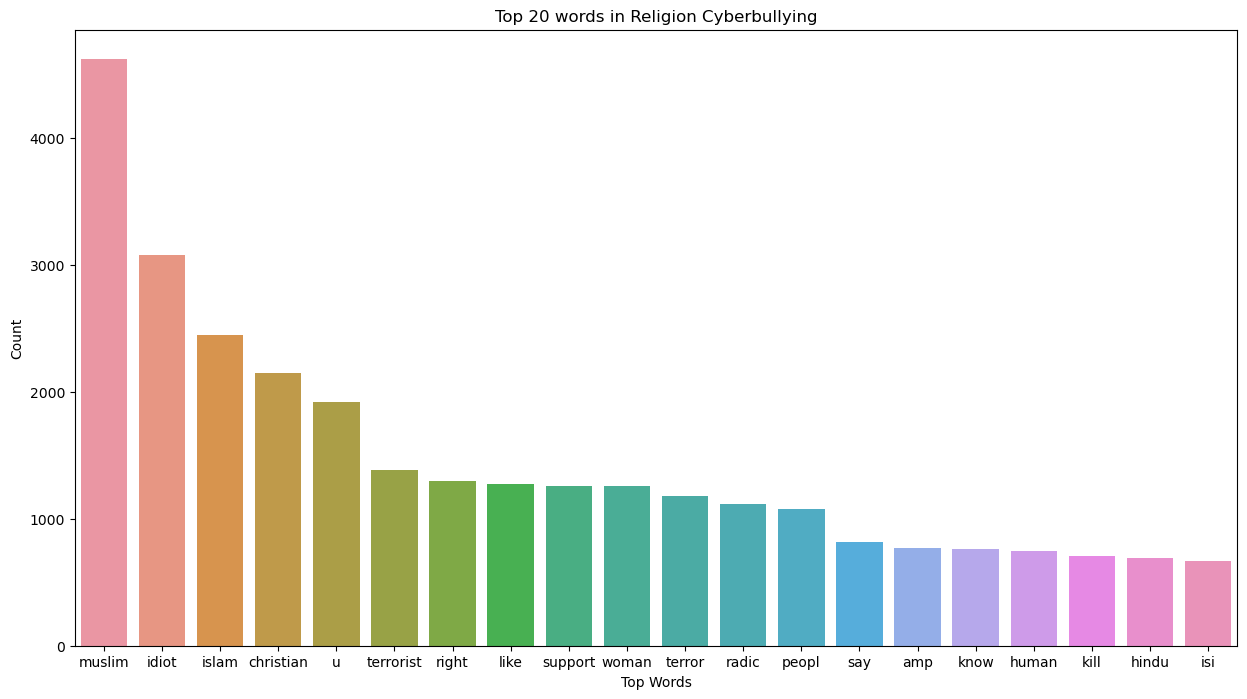

In [58]:
fig = plt.figure(figsize=(15,8))
sns.barplot(data=top20_religion, y="Count", x="Top Words")
plt.title("Top 20 words in Religion Cyberbullying")

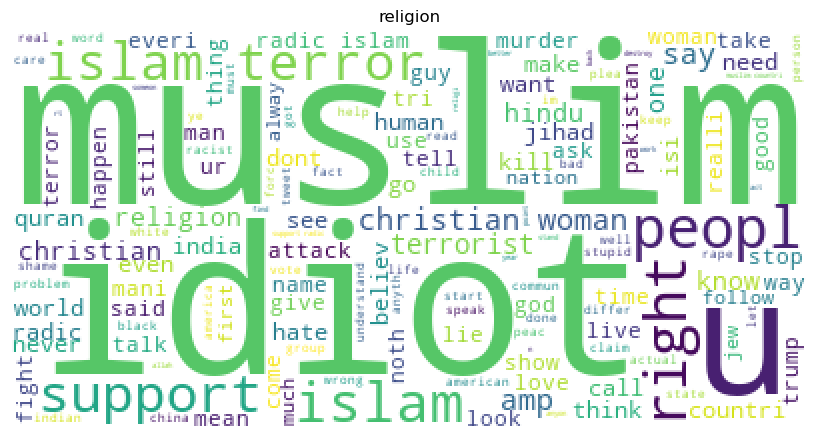

In [59]:
plot_wordcloud('religion')

In [60]:
# age based

# Assuming age_type['tweet_list'] is a list of lists of words
age = Counter([item for sublist in age_type['tweet_list'] for item in sublist])

# Creating a DataFrame from the Counter's most common elements
top20_age = pd.DataFrame(age.most_common(20))

# Assigning column names
top20_age.columns = ['Top Words', 'Count']

# Displaying the top 20 words with their counts
top20_age.style.background_gradient(cmap='Greens')

,Top Words,Count
0,bulli,8930
1,school,8458
2,high,4886
3,girl,4636
4,like,2082
5,get,1052
6,one,1045
7,peopl,935
8,got,842
9,kid,810


Text(0.5, 1.0, 'Top 20 words in Age Cyberbullying')

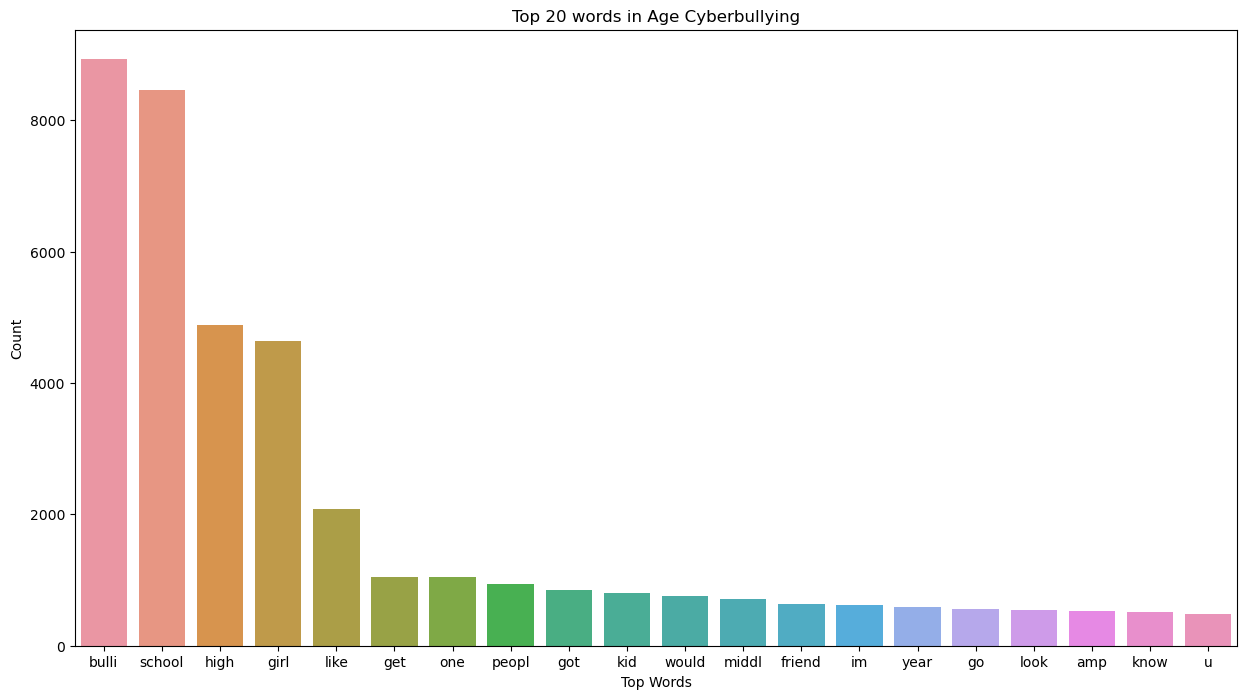

In [61]:
fig = plt.figure(figsize=(15,8))
sns.barplot(data=top20_age, y="Count", x="Top Words")
plt.title("Top 20 words in Age Cyberbullying")

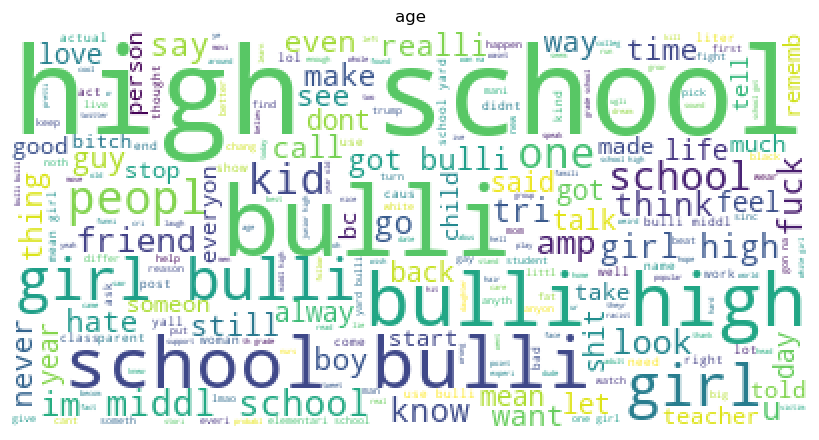

In [62]:
plot_wordcloud('age')

In [63]:
# ethinicity based

# Assuming ethnicity_type['tweet_list'] is a list of lists of words
ethnicity = Counter([item for sublist in ethnicity_type['tweet_list'] for item in sublist])

# Creating a DataFrame from the Counter's most common elements
top20_ethnicity = pd.DataFrame(ethnicity.most_common(20))

# Assigning column names
top20_ethnicity.columns = ['Top Words', 'Count']

# Displaying the top 20 words with their counts
top20_ethnicity.style.background_gradient(cmap='Greens')

,Top Words,Count
0,fuck,5983
1,nigger,5555
2,dumb,5103
3,as,2257
4,black,2139
5,u,2110
6,white,1560
7,call,1382
8,peopl,1185
9,rt,1137


Text(0.5, 1.0, 'Top 20 words in Ethnicity Cyberbullying')

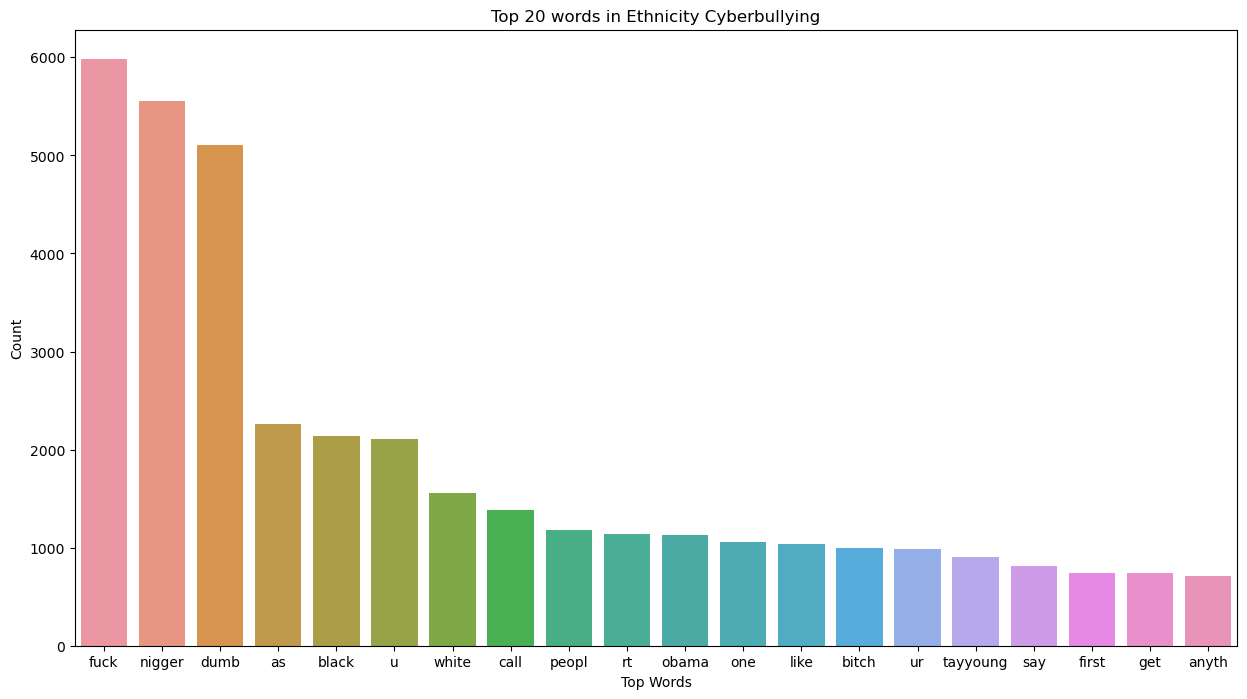

In [64]:
fig = plt.figure(figsize=(15,8))
sns.barplot(data=top20_ethnicity, y="Count", x="Top Words")
plt.title("Top 20 words in Ethnicity Cyberbullying")

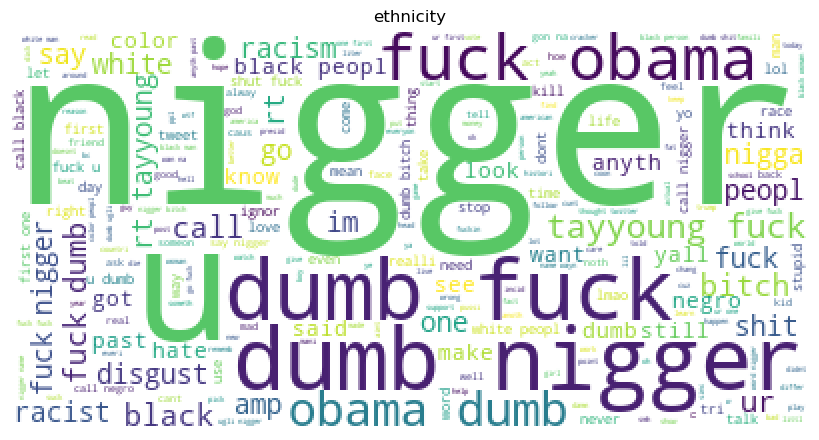

In [65]:
plot_wordcloud('ethnicity')

In [66]:
# other_cyberbullying based

# Assuming other_type['tweet_list'] is a list of lists of words
other_cyberbullying = Counter([item for sublist in other_cyberbullying_type['tweet_list'] for item in sublist])

# Creating a DataFrame from the Counter's most common elements
top20_other_cyberbullying = pd.DataFrame(other_cyberbullying.most_common(20))

# Assigning column names
top20_other_cyberbullying.columns = ['Top Words', 'Count']

# Displaying the top 20 words with their counts
top20_other_cyberbullying.style.background_gradient(cmap='Greens')

,Top Words,Count
0,bulli,924
1,rt,744
2,fuck,518
3,like,423
4,get,394
5,peopl,352
6,go,277
7,idiot,270
8,know,242
9,would,241


Text(0.5, 1.0, 'Top 20 words in Other_Cyberbullying Cyberbullying')

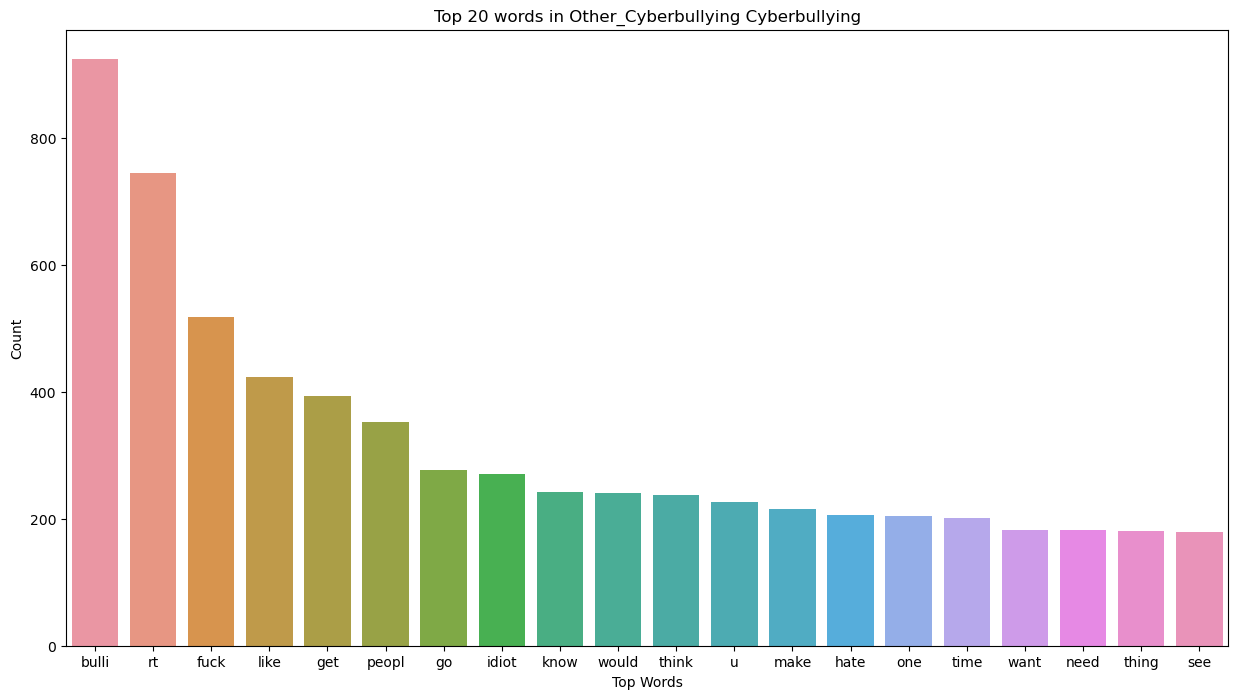

In [67]:
fig = plt.figure(figsize=(15,8))
sns.barplot(data=top20_other_cyberbullying, y="Count", x="Top Words")
plt.title("Top 20 words in Other_Cyberbullying Cyberbullying")

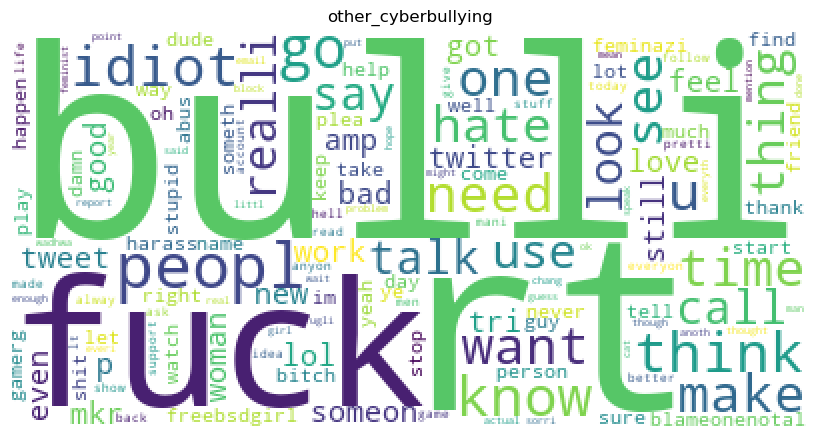

In [68]:
plot_wordcloud('other_cyberbullying')

In [69]:
# not_cyberbullying based

# Assuming not_cyberbullying_type['tweet_list'] is a list of lists of words
not_cyberbullying = Counter([item for sublist in not_cyberbullying_type['tweet_list'] for item in sublist])

# Creating a DataFrame from the Counter's most common elements
top20_not_cyberbullying = pd.DataFrame(not_cyberbullying.most_common(20))

# Assigning column names
top20_not_cyberbullying.columns = ['Top Words', 'Count']

# Displaying the top 20 words with their counts
top20_not_cyberbullying.style.background_gradient(cmap='Greens')

,Top Words,Count
0,mkr,1676
1,bulli,1157
2,rt,783
3,get,425
4,like,424
5,go,395
6,school,376
7,kat,287
8,would,286
9,peopl,273


Text(0.5, 1.0, 'Top 20 words in Not_Cyberbullying Cyberbullying')

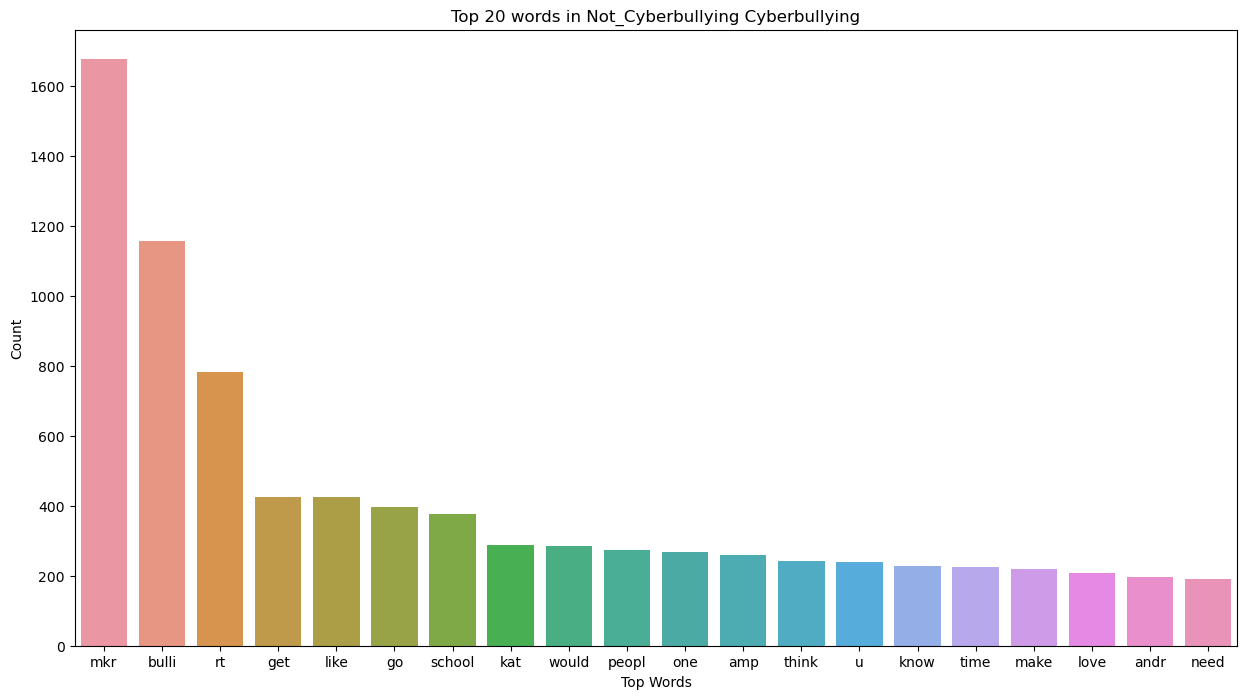

In [70]:
fig = plt.figure(figsize=(15,8))
sns.barplot(data=top20_not_cyberbullying, y="Count", x="Top Words")
plt.title("Top 20 words in Not_Cyberbullying Cyberbullying")

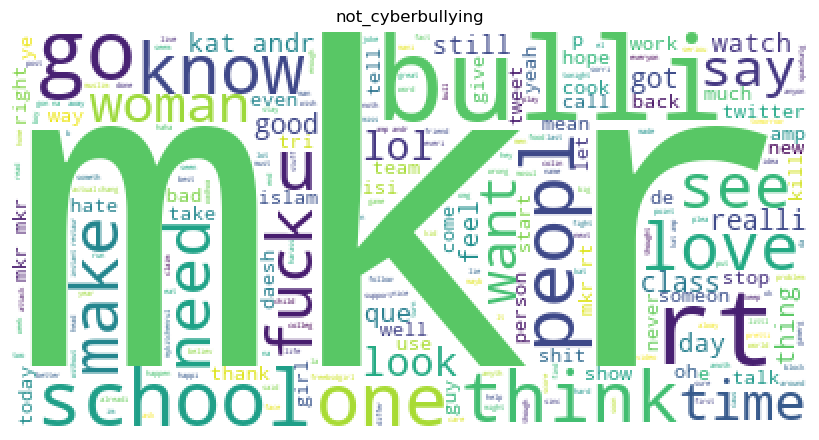

In [71]:
plot_wordcloud('not_cyberbullying')

In [72]:
df.head()

,text,sentiment,sentiment_encoded,cleaned_text,tweet_list,text_len
0,"In other words #katandandre, your food was cra...",not_cyberbullying,6,word katandandr food crapilici mkr,"[word, katandandr, food, crapilici, mkr]",5
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,6,aussietv white mkr theblock imacelebrityau tod...,"[aussietv, white, mkr, theblock, imacelebritya...",11
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,6,xochitlsuckkk classi whore red velvet cupcak,"[xochitlsuckkk, classi, whore, red, velvet, cu...",6
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,6,jasongio meh p thank head concern anoth angri ...,"[jasongio, meh, p, thank, head, concern, anoth...",10
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,6,rudhoeenglish isi account pretend kurdish acco...,"[rudhoeenglish, isi, account, pretend, kurdish...",9


In [73]:
sentiments = ["religion", "age", "ethnicity", "other_cybullying", "not_cyberbullying", "gender"]

In [74]:
# Modelling

In [75]:
# split data into test and train

X,Y = df['cleaned_text'],df['sentiment_encoded']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, stratify= Y, random_state= 42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(31999,) (31999,) (13714,) (13714,)


In [77]:
# tf - idf vectorization

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer()
X_train_tf = tf_idf.fit_transform(X_train)
X_test_tf = tf_idf.transform(X_test)
print(X_train_tf.shape)
print(X_test_tf.shape)

(31999, 41611)
(13714, 41611)


In [79]:
# trying different models

In [80]:
# Logistics

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

In [81]:
from sklearn.model_selection import cross_val_score

log_cv_score = cross_val_score(log_reg, X_train_tf, y_train, cv=5, scoring='f1_macro', n_jobs=-1)
print(log_cv_score)


[0.83109097 0.83539275 0.82842656 0.83160673 0.8360907 ]


In [82]:
mean_log_cv = np.mean(log_cv_score)
mean_log_cv

0.8325215419519066

In [83]:
# support vector

lin_svc = LinearSVC()

In [84]:
lin_svc_cv_score = cross_val_score(lin_svc, X_train_tf, y_train, cv=5, scoring='f1_macro', n_jobs=-1)
mean_lin_svc_cv = np.mean(lin_svc_cv_score)
mean_lin_svc_cv

0.8331631819144736

In [85]:
# naive bayes classifier

multiNB = MultinomialNB()

In [86]:
multiNB_cv_score = cross_val_score(multiNB, X_train_tf, y_train, cv=5, scoring='f1_macro', n_jobs=-1)
mean_multiNB_cv = np.mean(multiNB_cv_score)
mean_multiNB_cv

0.6877228787245776

In [87]:
# decision tree

dtree = DecisionTreeClassifier()

In [88]:
dtree_cv_score = cross_val_score(dtree, X_train_tf, y_train, cv=5, scoring='f1_macro', n_jobs=-1)
mean_dtree_cv = np.mean(dtree_cv_score)
mean_dtree_cv

0.8128954034781423

In [89]:
# using svm for model

In [92]:
# tuing svc 

svc1 = LinearSVC()
param_grid = {'C':[0.0001,0.001,0.01,0.1,1,10],
             'loss':['hinge','squared_hinage'],
             'fit_intercept':[True,False]}
grid_search = GridSearchCV(svc1,param_grid,cv=5,scoring='f1_macro', n_jobs=-1,verbose=0,return_train_score=True)
grid_search.fit(X_train_tf,y_train)

GridSearchCV(cv=5, estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'fit_intercept': [True, False],
                         'loss': ['hinge', 'squared_hinage']},
             return_train_score=True, scoring='f1_macro')

In [93]:
grid_search.best_estimator_

LinearSVC(C=1, loss='hinge')

In [94]:
grid_search.best_score_

0.8369907454234575

In [95]:
# evaluation

In [96]:
lin_svc.fit(X_train_tf,y_train)
y_pred = lin_svc.predict(X_test_tf)

In [97]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

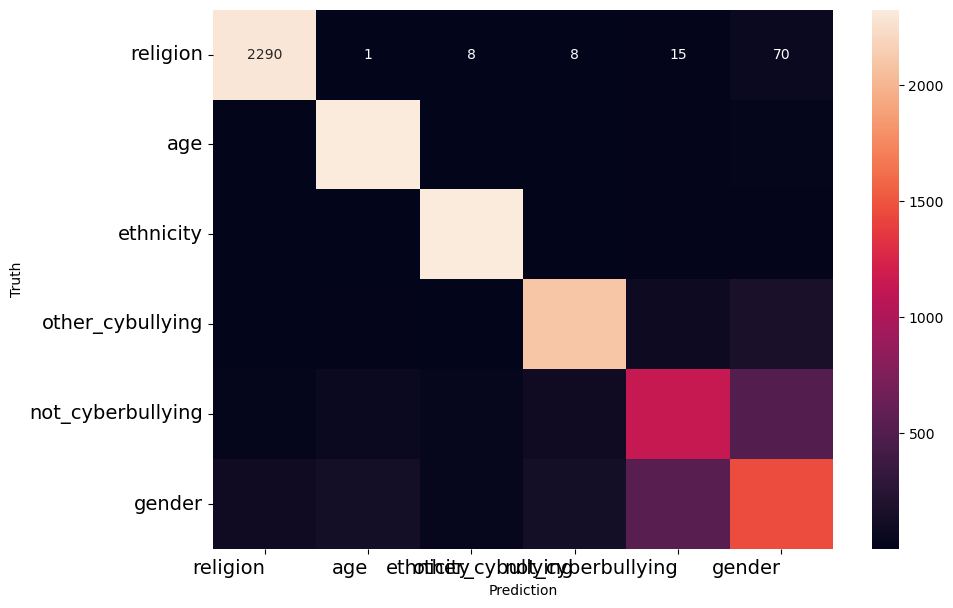

In [98]:
cm = confusion_matrix(y_test,y_pred)
print_confusion_matrix(cm,sentiments)

In [99]:
print('Classification Report:\n', classification_report(y_test, y_pred, target_names=sentiments))

Classification Report:
                    precision    recall  f1-score   support

         religion       0.95      0.96      0.95      2392
              age       0.92      0.98      0.95      2373
        ethnicity       0.96      0.98      0.97      2364
 other_cybullying       0.90      0.89      0.89      2357
not_cyberbullying       0.63      0.61      0.62      1856
           gender       0.65      0.62      0.63      2372

         accuracy                           0.85     13714
        macro avg       0.84      0.84      0.84     13714
     weighted avg       0.84      0.85      0.85     13714



In [100]:
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tf_idf, f)

In [101]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(lin_svc, f)